## [Intro]

# AREF JOZI
#### This is my tutorial project of a dataset including some features about 4000 houses in Tehran. The purpose is to estimate the prices. Done by Aref Jozi on Jan 2023
#### This project is designed by collaboration of maktabkhooneh and Jadi and represented in Season 2(Regression) of Machine Learning by Python
#### Program Sequence:

### Linear Regression
- Intro
- importing libraries
- calling and details
- preprocessing
- most relevant features
- split test and train set
- plotting the data
- modeling
- prediction

## [importing libraries]

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ab
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## [calling and details]

In [66]:
#racalling the csv file
df = pd.read_csv("e:/1632300362534233.csv")
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3500000000,116666.67
3475,83,2,True,True,True,Niavaran,6800000000,226666.67
3476,75,2,False,False,False,Parand,365000000,12166.67
3477,105,2,True,True,True,Dorous,5600000000,186666.67


In [34]:
df.Address.value_counts()

Punak                     161
Pardis                    146
West Ferdows Boulevard    145
Gheitarieh                141
Shahran                   130
                         ... 
Chardangeh                  1
Mehrabad                    1
Pakdasht KhatunAbad         1
Kazemabad                   1
Yakhchiabad                 1
Name: Address, Length: 192, dtype: int64

In [63]:
df.describe()

,Room,Price,Price(USD)
count,3456.000000,3.456000e+03,3.456000e+03
mean,2.081308,5.379957e+09,1.793319e+05
std,0.759723,8.121729e+09,2.707243e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.420000e+09,4.733333e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [13]:
df.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33
5,70,2,True,True,False,North Program Organization,2050000000,68333.33
6,87,2,True,True,True,Pardis,600000000,20000.00
7,59,1,True,True,True,Shahran,2150000000,71666.67
8,54,2,True,True,False,Andisheh,493000000,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2370000000,79000.00


In [14]:
df.tail(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
3469,74,2,True,True,True,Mehran,4070000000,135666.67
3470,97,2,True,True,True,Shahran,2700000000,90000.00
3471,94,2,True,True,True,Niavaran,8450000000,281666.67
3472,113,3,True,True,True,Ostad Moein,3170000000,105666.67
3473,63,1,True,True,False,Feiz Garden,1890000000,63000.00
3474,86,2,True,True,True,Southern Janatabad,3500000000,116666.67
3475,83,2,True,True,True,Niavaran,6800000000,226666.67
3476,75,2,False,False,False,Parand,365000000,12166.67
3477,105,2,True,True,True,Dorous,5600000000,186666.67
3478,82,2,False,True,True,Parand,360000000,12000.00


In [64]:
def show_all(df):
    #This fuction lets us view the full dataframe
    with pd.option_context('display.max_rows', 400, 'display.max_columns', 100):
        display(df)
show_all(df)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33
...,...,...,...,...,...,...,...,...
3451,86,2,True,True,True,Southern Janatabad,3500000000,116666.67
3452,83,2,True,True,True,Niavaran,6800000000,226666.67
3453,75,2,False,False,False,Parand,365000000,12166.67
3454,105,2,True,True,True,Dorous,5600000000,186666.67


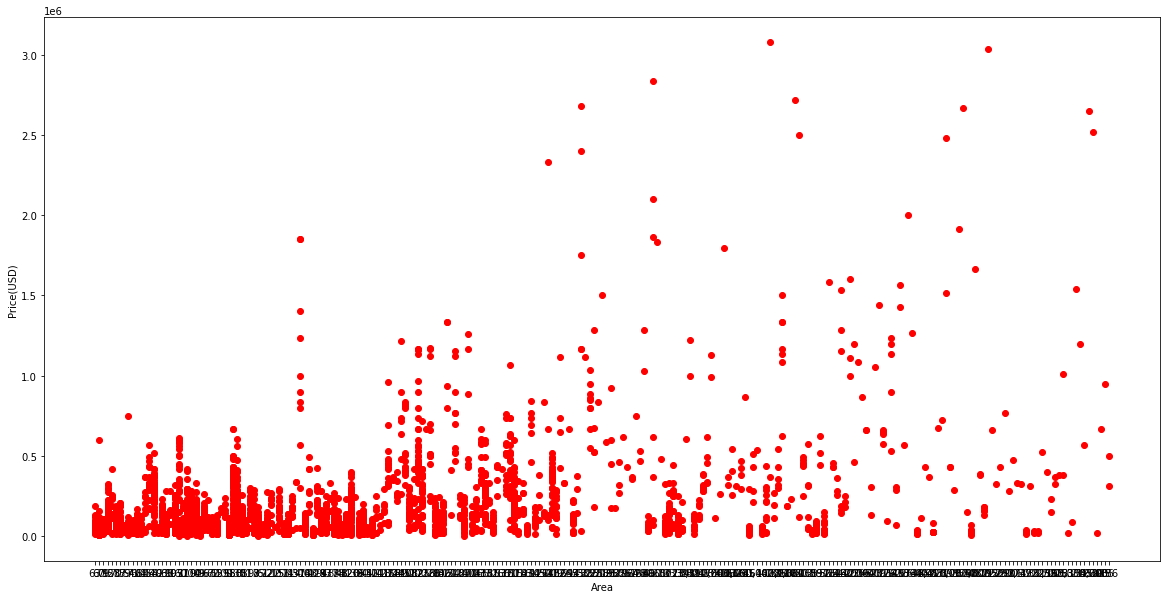

In [71]:
plt.figure(figsize=(20,10))
x_data , y_data = (df["Area"].values , df["Price(USD)"].values )
plt.plot(x_data , y_data , 'ro')

plt.xlabel('Area')
plt.ylabel('Price(USD)')
plt.show()

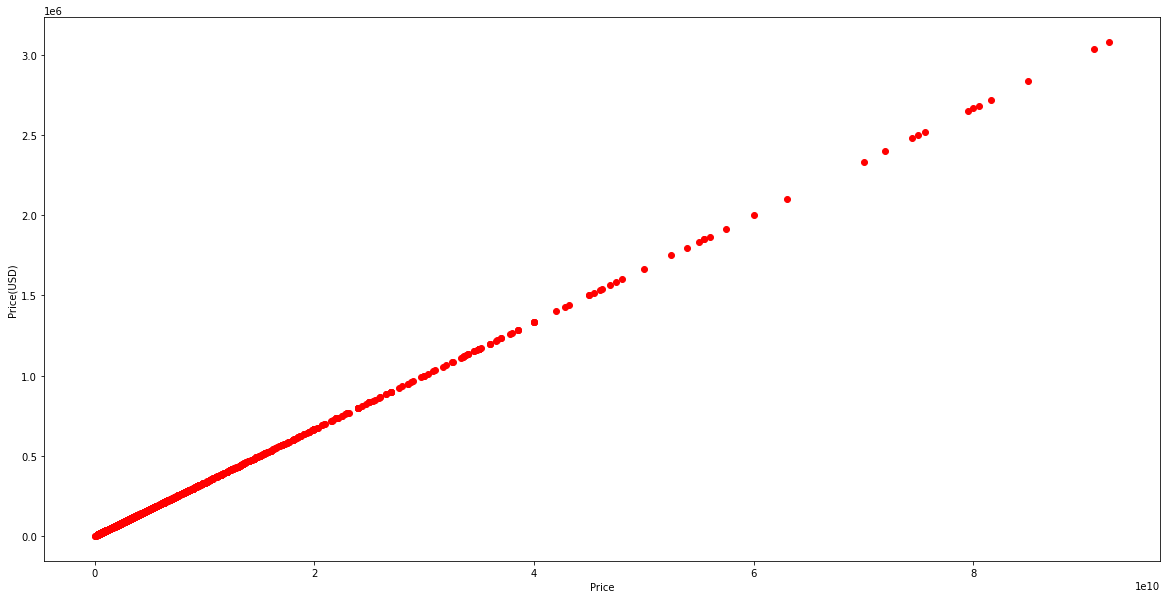

In [72]:
plt.figure(figsize=(20,10))
x_data , y_data = (df["Price"].values , df["Price(USD)"].values )
plt.plot(x_data , y_data , 'ro')
plt.ylabel('Price(USD)')
plt.xlabel('Price')
plt.show()

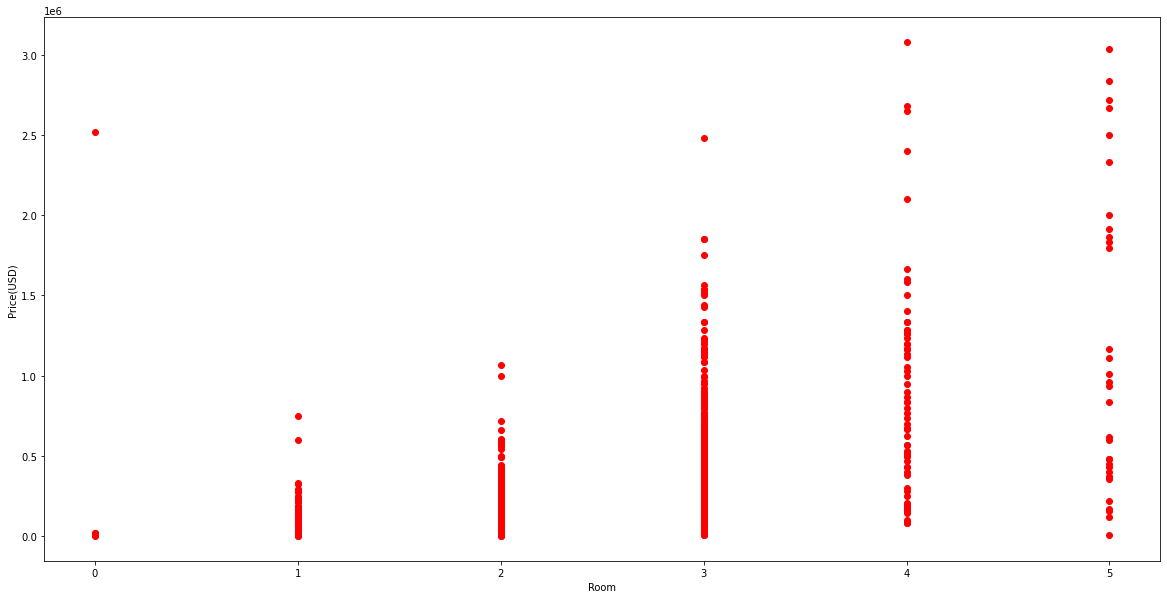

In [73]:
plt.figure(figsize=(20,10))
x_data , y_data = (df["Room"].values , df["Price(USD)"].values )
plt.plot(x_data , y_data , 'ro')

plt.xlabel('Room')
plt.ylabel('Price(USD)')
plt.show()

In [18]:
max(x_data)

'99'

In [19]:
max(y_data)

3080000.0

## [preprocessing]

In [40]:
#discovering NaN values
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [67]:
#eliminating NaN values

df = df.dropna()
df = df.reset_index(drop=True)

print (df)

     Area  Room  Parking  Warehouse  Elevator             Address       Price  \
0      63     1     True       True      True             Shahran  1850000000   
1      60     1     True       True      True             Shahran  1850000000   
2      79     2     True       True      True              Pardis   550000000   
3      95     2     True       True      True       Shahrake Qods   902500000   
4     123     2     True       True      True      Shahrake Gharb  7000000000   
...   ...   ...      ...        ...       ...                 ...         ...   
3451   86     2     True       True      True  Southern Janatabad  3500000000   
3452   83     2     True       True      True            Niavaran  6800000000   
3453   75     2    False      False     False              Parand   365000000   
3454  105     2     True       True      True              Dorous  5600000000   
3455   82     2    False       True      True              Parand   360000000   

      Price(USD)  
0       

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3456 entries, 0 to 3455
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3456 non-null   object 
 1   Room        3456 non-null   int64  
 2   Parking     3456 non-null   bool   
 3   Warehouse   3456 non-null   bool   
 4   Elevator    3456 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3456 non-null   int64  
 7   Price(USD)  3456 non-null   float64
dtypes: bool(3), float64(1), int64(2), object(2)
memory usage: 145.2+ KB


<AxesSubplot:>

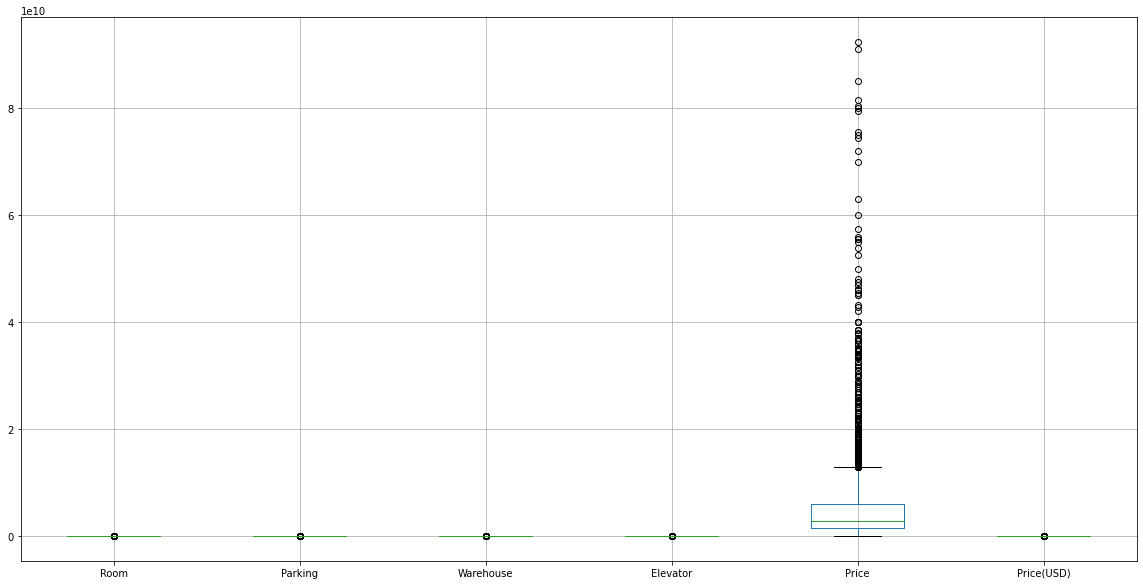

In [50]:
#eliminating NaN values
df.boxplot(figsize=(20,10))

In [74]:
y = df.Price
y

0       1850000000
1       1850000000
2        550000000
3        902500000
4       7000000000
           ...    
3451    3500000000
3452    6800000000
3453     365000000
3454    5600000000
3455     360000000
Name: Price, Length: 3456, dtype: int64

In [122]:
dfarea = df[df['Area'] > 1000 ]
dfarea

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)


In [116]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1850000000,61666.67
1,60.0,1,True,True,True,Shahran,1850000000,61666.67
2,79.0,2,True,True,True,Pardis,550000000,18333.33
3,95.0,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7000000000,233333.33
...,...,...,...,...,...,...,...,...
3451,86.0,2,True,True,True,Southern Janatabad,3500000000,116666.67
3452,83.0,2,True,True,True,Niavaran,6800000000,226666.67
3453,75.0,2,False,False,False,Parand,365000000,12166.67
3454,105.0,2,True,True,True,Dorous,5600000000,186666.67


In [120]:
df = df.drop(index=[706,1598,2161,2788])
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1850000000,61666.67
1,60.0,1,True,True,True,Shahran,1850000000,61666.67
2,79.0,2,True,True,True,Pardis,550000000,18333.33
3,95.0,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7000000000,233333.33
...,...,...,...,...,...,...,...,...
3451,86.0,2,True,True,True,Southern Janatabad,3500000000,116666.67
3452,83.0,2,True,True,True,Niavaran,6800000000,226666.67
3453,75.0,2,False,False,False,Parand,365000000,12166.67
3454,105.0,2,True,True,True,Dorous,5600000000,186666.67


In [124]:
df =df[df['Parking'].notnull()].copy()
df['Parking'] =df['Parking'].astype(int)
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,1,True,True,Shahran,1850000000,61666.67
1,60.0,1,1,True,True,Shahran,1850000000,61666.67
2,79.0,2,1,True,True,Pardis,550000000,18333.33
3,95.0,2,1,True,True,Shahrake Qods,902500000,30083.33
4,123.0,2,1,True,True,Shahrake Gharb,7000000000,233333.33
...,...,...,...,...,...,...,...,...
3451,86.0,2,1,True,True,Southern Janatabad,3500000000,116666.67
3452,83.0,2,1,True,True,Niavaran,6800000000,226666.67
3453,75.0,2,0,False,False,Parand,365000000,12166.67
3454,105.0,2,1,True,True,Dorous,5600000000,186666.67


In [125]:
df =df[df['Warehouse'].notnull()].copy()
df['Warehouse'] =df['Warehouse'].astype(int)
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,1,1,True,Shahran,1850000000,61666.67
1,60.0,1,1,1,True,Shahran,1850000000,61666.67
2,79.0,2,1,1,True,Pardis,550000000,18333.33
3,95.0,2,1,1,True,Shahrake Qods,902500000,30083.33
4,123.0,2,1,1,True,Shahrake Gharb,7000000000,233333.33
...,...,...,...,...,...,...,...,...
3451,86.0,2,1,1,True,Southern Janatabad,3500000000,116666.67
3452,83.0,2,1,1,True,Niavaran,6800000000,226666.67
3453,75.0,2,0,0,False,Parand,365000000,12166.67
3454,105.0,2,1,1,True,Dorous,5600000000,186666.67


In [127]:
df =df[df['Elevator'].notnull()].copy()
df['Elevator'] =df['Elevator'].astype(int)
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,1,1,1,Shahran,1850000000,61666.67
1,60.0,1,1,1,1,Shahran,1850000000,61666.67
2,79.0,2,1,1,1,Pardis,550000000,18333.33
3,95.0,2,1,1,1,Shahrake Qods,902500000,30083.33
4,123.0,2,1,1,1,Shahrake Gharb,7000000000,233333.33
...,...,...,...,...,...,...,...,...
3451,86.0,2,1,1,1,Southern Janatabad,3500000000,116666.67
3452,83.0,2,1,1,1,Niavaran,6800000000,226666.67
3453,75.0,2,0,0,0,Parand,365000000,12166.67
3454,105.0,2,1,1,1,Dorous,5600000000,186666.67


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3451 entries, 0 to 3455
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3451 non-null   float64
 1   Room        3451 non-null   int64  
 2   Parking     3451 non-null   int32  
 3   Warehouse   3451 non-null   int32  
 4   Elevator    3451 non-null   int32  
 5   Address     3451 non-null   object 
 6   Price       3451 non-null   int64  
 7   Price(USD)  3451 non-null   float64
dtypes: float64(2), int32(3), int64(2), object(1)
memory usage: 202.2+ KB


In [130]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()
df['Address'] =encoder.fit_transform(df.Address)
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,1,1,1,156,1850000000,61666.67
1,60.0,1,1,1,1,156,1850000000,61666.67
2,79.0,2,1,1,1,117,550000000,18333.33
3,95.0,2,1,1,1,152,902500000,30083.33
4,123.0,2,1,1,1,150,7000000000,233333.33
...,...,...,...,...,...,...,...,...
3451,86.0,2,1,1,1,163,3500000000,116666.67
3452,83.0,2,1,1,1,105,6800000000,226666.67
3453,75.0,2,0,0,0,115,365000000,12166.67
3454,105.0,2,1,1,1,39,5600000000,186666.67


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3451 entries, 0 to 3455
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3451 non-null   float64
 1   Room        3451 non-null   int64  
 2   Parking     3451 non-null   int32  
 3   Warehouse   3451 non-null   int32  
 4   Elevator    3451 non-null   int32  
 5   Address     3451 non-null   int64  
 6   Price       3451 non-null   int64  
 7   Price(USD)  3451 non-null   float64
dtypes: float64(2), int32(3), int64(3)
memory usage: 202.2 KB


In [132]:
df =df[df['Price'].notnull()].copy()
df['Price'] =df['Price'].astype(float)
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,1,1,1,156,1.850000e+09,61666.67
1,60.0,1,1,1,1,156,1.850000e+09,61666.67
2,79.0,2,1,1,1,117,5.500000e+08,18333.33
3,95.0,2,1,1,1,152,9.025000e+08,30083.33
4,123.0,2,1,1,1,150,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3451,86.0,2,1,1,1,163,3.500000e+09,116666.67
3452,83.0,2,1,1,1,105,6.800000e+09,226666.67
3453,75.0,2,0,0,0,115,3.650000e+08,12166.67
3454,105.0,2,1,1,1,39,5.600000e+09,186666.67


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3451 entries, 0 to 3455
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3451 non-null   float64
 1   Room        3451 non-null   int64  
 2   Parking     3451 non-null   int32  
 3   Warehouse   3451 non-null   int32  
 4   Elevator    3451 non-null   int32  
 5   Address     3451 non-null   int64  
 6   Price       3451 non-null   float64
 7   Price(USD)  3451 non-null   float64
dtypes: float64(3), int32(3), int64(2)
memory usage: 202.2 KB


## [most relevant features]

In [134]:
corr_matrix =df.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price(USD)    1.000000
Price         1.000000
Area          0.706661
Room          0.567862
Parking       0.191240
Elevator      0.111573
Warehouse     0.109691
Address      -0.075962
Name: Price, dtype: float64

In [135]:
data_for_set_model =df.copy()
mean =(data_for_set_model.groupby('Address').mean()['Area'])
mean_price =data_for_set_model.groupby('Address').mean()['Price']
data_for_set_model['The_value_of_each_address'] =(data_for_set_model['Address'].map(mean_price))/(data_for_set_model['Address'].map(mean))

data_for_set_model

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),The_value_of_each_address
0,63.0,1,1,1,1,156,1.850000e+09,61666.67,3.654189e+07
1,60.0,1,1,1,1,156,1.850000e+09,61666.67,3.654189e+07
2,79.0,2,1,1,1,117,5.500000e+08,18333.33,8.014821e+06
3,95.0,2,1,1,1,152,9.025000e+08,30083.33,9.989330e+06
4,123.0,2,1,1,1,150,7.000000e+09,233333.33,8.590476e+07
...,...,...,...,...,...,...,...,...,...
3451,86.0,2,1,1,1,163,3.500000e+09,116666.67,3.921412e+07
3452,83.0,2,1,1,1,105,6.800000e+09,226666.67,1.108802e+08
3453,75.0,2,0,0,0,115,3.650000e+08,12166.67,6.435927e+06
3454,105.0,2,1,1,1,39,5.600000e+09,186666.67,9.718675e+07


## [split test and train set]

In [136]:
data_for_set_model["Room_pre_Area"] =data_for_set_model['Room']/data_for_set_model["Area"]
data_for_set_model

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),The_value_of_each_address,Room_pre_Area
0,63.0,1,1,1,1,156,1.850000e+09,61666.67,3.654189e+07,0.015873
1,60.0,1,1,1,1,156,1.850000e+09,61666.67,3.654189e+07,0.016667
2,79.0,2,1,1,1,117,5.500000e+08,18333.33,8.014821e+06,0.025316
3,95.0,2,1,1,1,152,9.025000e+08,30083.33,9.989330e+06,0.021053
4,123.0,2,1,1,1,150,7.000000e+09,233333.33,8.590476e+07,0.016260
...,...,...,...,...,...,...,...,...,...,...
3451,86.0,2,1,1,1,163,3.500000e+09,116666.67,3.921412e+07,0.023256
3452,83.0,2,1,1,1,105,6.800000e+09,226666.67,1.108802e+08,0.024096
3453,75.0,2,0,0,0,115,3.650000e+08,12166.67,6.435927e+06,0.026667
3454,105.0,2,1,1,1,39,5.600000e+09,186666.67,9.718675e+07,0.019048


In [137]:
corr_matrix =data_for_set_model.corr()
corr_matrix["Price"].sort_values(ascending =False)

Price(USD)                   1.000000
Price                        1.000000
Area                         0.706661
The_value_of_each_address    0.663762
Room                         0.567862
Parking                      0.191240
Elevator                     0.111573
Warehouse                    0.109691
Address                     -0.075962
Room_pre_Area               -0.395177
Name: Price, dtype: float64

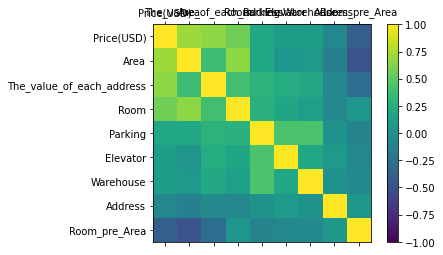

In [179]:
names=['Price(USD)','Area','The_value_of_each_address','Room','Parking','Elevator','Warehouse','Address','Room_pre_Area']
df=data[names]
correlations= df.corr()
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [138]:
data=data_for_set_model.copy()

train_set , test_set =train_test_split(data , test_size =0.2 , random_state =42)
train_set,test_set

(       Area  Room  Parking  Warehouse  Elevator  Address         Price  \
 48     60.0     1        1          1         1        1  2.460000e+09   
 2514   58.0     1        0          0         1      115  3.200000e+08   
 2947   62.0     2        1          1         0      122  2.100000e+09   
 811   155.0     3        1          1         1       57  9.800000e+09   
 3085   76.0     2        1          1         0      156  1.990000e+09   
 ...     ...   ...      ...        ...       ...      ...           ...   
 1097  102.0     2        1          1         1      163  5.600000e+09   
 1132  108.0     2        1          1         1      118  7.700000e+09   
 1296  145.0     2        1          1         1       57  1.200000e+10   
 862    84.0     3        1          1         1       13  1.590000e+09   
 3179   75.0     2        0          0         0      115  3.950000e+08   
 
       Price(USD)  The_value_of_each_address  Room_pre_Area  
 48      82000.00               4.30

## [plotting the data]

In [143]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='Room', ylabel='Room'>,
        <AxesSubplot:xlabel='Price', ylabel='Room'>,
        <AxesSubplot:xlabel='Area', ylabel='Room'>,
        <AxesSubplot:xlabel='The_value_of_each_address', ylabel='Room'>,
        <AxesSubplot:xlabel='Room_pre_Area', ylabel='Room'>],
       [<AxesSubplot:xlabel='Room', ylabel='Price'>,
        <AxesSubplot:xlabel='Price', ylabel='Price'>,
        <AxesSubplot:xlabel='Area', ylabel='Price'>,
        <AxesSubplot:xlabel='The_value_of_each_address', ylabel='Price'>,
        <AxesSubplot:xlabel='Room_pre_Area', ylabel='Price'>],
       [<AxesSubplot:xlabel='Room', ylabel='Area'>,
        <AxesSubplot:xlabel='Price', ylabel='Area'>,
        <AxesSubplot:xlabel='Area', ylabel='Area'>,
        <AxesSubplot:xlabel='The_value_of_each_address', ylabel='Area'>,
        <AxesSubplot:xlabel='Room_pre_Area', ylabel='Area'>],
       [<AxesSubplot:xlabel='Room', ylabel='The_value_of_each_address'>,
        <AxesSubplot:xlabel='Price', ylabel='T

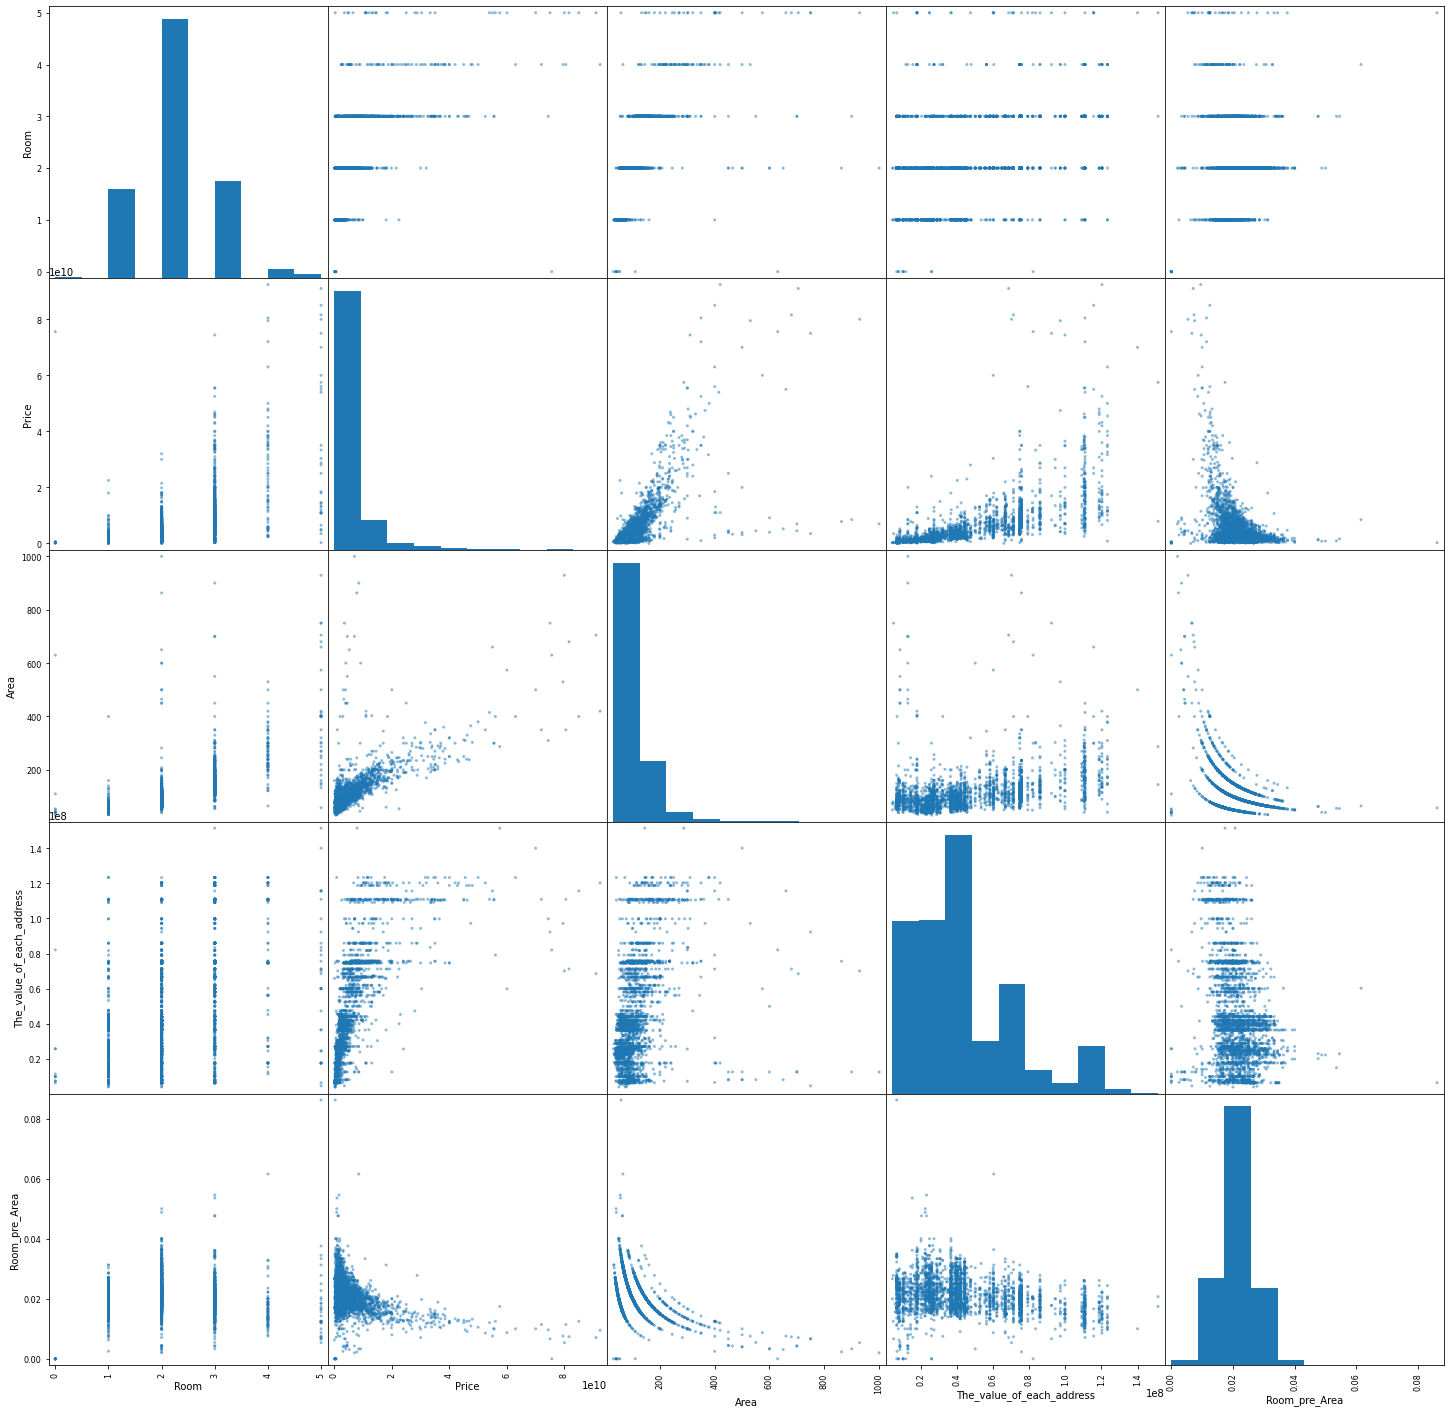

In [144]:
Numerical_chart=['Room','Price','Area','The_value_of_each_address','Room_pre_Area']
scatter_matrix(data[Numerical_chart],figsize=(25,25))

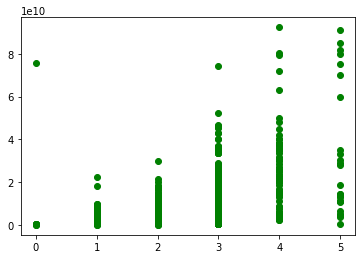

In [165]:
plt.scatter(train_set.Room, train_set.Price,  color='green')
plt.show()

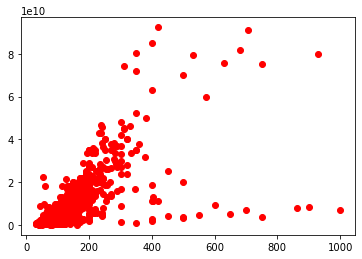

In [166]:
plt.scatter(train_set.Area, train_set.Price,  color='red')
plt.show()

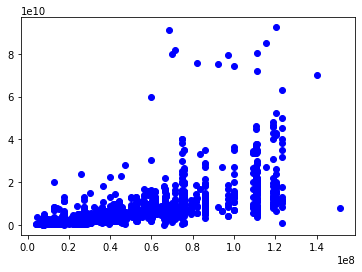

In [147]:
plt.scatter(train_set.The_value_of_each_address, train_set.Price,  color='blue')
plt.show()

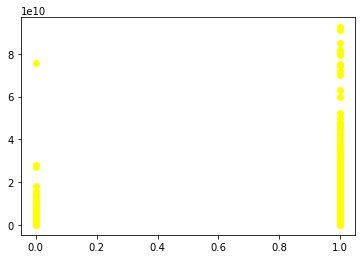

In [167]:
plt.scatter(train_set.Parking, train_set.Price,  color='yellow')
plt.show()

In [148]:
# selected features:
# the value of each address
# area
# room
# parking

## [modeling and prediction]

In [151]:
from sklearn import linear_model
regr =linear_model.LinearRegression()
x =np.asanyarray(train_set[['The_value_of_each_address','Room','Parking', 'Area']])
y =np.asanyarray(train_set[['Price']])
regr.fit (x, y)

print ('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[ 1.31038891e+02  6.98195771e+08 -1.44830738e+09  5.78104090e+07]]
Intercept:  [-6.68615341e+09]


In [152]:
y_hat =regr.predict(test_set[['The_value_of_each_address','Room','Parking','Area']])
x =np.asanyarray(test_set[['The_value_of_each_address','Room','Parking','Area']])
y =np.asanyarray(test_set[['Price']])
print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))

print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 17151176706904813568.00
Variance score: 0.72


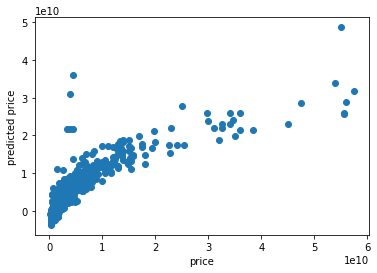

In [156]:
plt.scatter(y,y_hat)
plt.xlabel('price')
plt.ylabel('predicted price')
plt.show()

C:\Users\Albaloo.Co\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

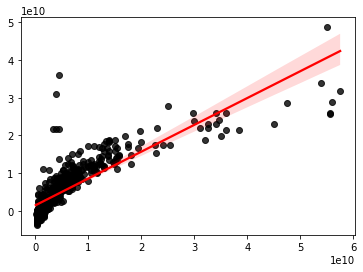

In [187]:
ab.regplot(y,y_hat,scatter_kws={"color": "black"}, line_kws={"color": "red"})